In [104]:
# 1. Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


In [105]:
# 2. Import the dataset (same directory)
df = pd.read_csv('melb_data.csv')

In [106]:
# 3. Data Visualization
print(df.head())
print(df.shape)
print(df.info())

for col in df.columns:     
    print(df[col].value_counts()/np.float64(len(df)))


       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

In [107]:
# 4. EDA : target attribute - Type  
# h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse;
print(df['Type'].value_counts())
print()
print(df['Type'].value_counts()/np.float64(len(df)))


Type
h    9449
u    3017
t    1114
Name: count, dtype: int64

Type
h    0.695803
u    0.222165
t    0.082032
Name: count, dtype: float64


In [108]:
# 4. EDA : Missing Data Check
print(df.isnull().sum())
print((df.isnull().sum()/np.float64(len(df))).sort_values(ascending=False))

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64
BuildingArea     0.474963
YearBuilt        0.395803
CouncilArea      0.100810
Car              0.004566
Suburb           0.000000
Bathroom         0.000000
Regionname       0.000000
Longtitude       0.000000
Lattitude        0.000000
Landsize         0.000000
Bedroom2         0.000000
Address          0.000000
Postcode         0.000000
Distance         0.000000
Date             0.000000
SellerG          0.000000
Method           0.000000
Price            0.000000
Type             0.000000
Rooms            0.000000
Prope

In [109]:
# 4. EDA : CDA 10% OVER
df = df.drop(columns=['BuildingArea','YearBuilt','CouncilArea'])

# 4. EDA : SimpleImputer 10% UNDER 
imputer = SimpleImputer(strategy='mean')
Car = df ['Car'].values.reshape (-1, 1)
imputed_Car = imputer.fit_transform(Car)
df['Car'] = imputed_Car

print(df.isnull().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


In [110]:
# 4. EDA : Not Categorical data
df = df.drop(columns=['Suburb','Address','Date','Lattitude','Longtitude','Regionname'])


# 4. EDA : Categorical data Labelencoding
encoder = LabelEncoder()
df['Method'] = encoder.fit_transform(np.array(df['Method'].values.reshape(-1,1)))
df['SellerG'] = encoder.fit_transform(np.array(df['SellerG'].values.reshape(-1,1)))
df['Type'] = encoder.fit_transform(np.array(df['Type'].values.reshape(-1,1)))

c:\Users\이종영\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\이종영\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\이종영\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


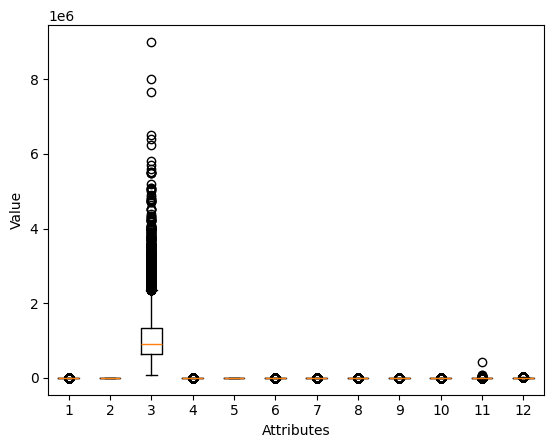

In [111]:
# 4. EDA: Outliers
plt.boxplot(df)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

In [112]:
# 5. Feature Scaling & Split data into separate training and test set 8:2,5
training_points = df.drop(columns=['Type'])
training_labels = df['Type']

scaler = StandardScaler()
train_points_scaled = scaler.fit_transform(training_points)

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.2, 
	random_state=5)

print(X_train)
print(y_train)
print(X_test)
print(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

       Rooms      Price  Method  SellerG  Distance  Postcode  Bedroom2  \
10188      3  1628000.0       1      155       3.5    3054.0       3.0   
10624      2   760000.0       1      155       6.7    3058.0       2.0   
8760       3   630000.0       0      257      14.8    3023.0       3.0   
10844      3   795000.0       4      188      15.5    3106.0       3.0   
10049      3   900000.0       4       40       2.7    3141.0       3.0   
...      ...        ...     ...      ...       ...       ...       ...   
3046       4  2400000.0       0      160      13.7    3188.0       4.0   
9917       2  1480000.0       1      135       5.3    3122.0       0.0   
4079       4  1361500.0       1      204       6.9    3039.0       4.0   
2254       2   577000.0       1       94       8.5    3185.0       2.0   
2915       2   230000.0       0      194      13.0    3046.0       2.0   

       Bathroom  Car  Landsize  Propertycount  
10188       1.0  0.0     216.0         3106.0  
10624       1.0

In [113]:
# 6-1. Create a Gaussian Classifier : Decision Tree
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train,y_train)
guesses = classifier.predict(X_test)

In [114]:
# 6-2. Check Accuracy Score
print("Confusion Matrix: ",confusion_matrix(y_test, guesses))
print("Accuracy: ",metrics.accuracy_score(y_test, guesses))

Confusion Matrix:  [[1734   96   65]
 [  80   90   42]
 [  71   71  467]]
Accuracy:  0.843519882179676


In [115]:
# 6-3 Create a Gaussian Classifier : Random Forest 
classifier = RandomForestClassifier(random_state=0, n_estimators=3)
classifier.fit(X_train,y_train)
guesses = classifier.predict(X_test)

In [116]:
# 6-4. Check Accuracy Score
print("Confusion Matrix: ",confusion_matrix(y_test, guesses))
print("Accuracy: ",metrics.accuracy_score(y_test, guesses))

Confusion Matrix:  [[1789   50   56]
 [  99   79   34]
 [  84   48  477]]
Accuracy:  0.8634020618556701


In [117]:
# 6-5. Create a Gaussian Classifier : Random Forest increasing trees
classifier = RandomForestClassifier(random_state=0, n_estimators=10)
classifier.fit(X_train,y_train)
guesses = classifier.predict(X_test)

In [118]:
# 6-6. Check Accuracy Score
print("Confusion Matrix: ",confusion_matrix(y_test, guesses))
print("Accuracy: ",metrics.accuracy_score(y_test, guesses))

Confusion Matrix:  [[1805   43   47]
 [  90   88   34]
 [  74   44  491]]
Accuracy:  0.8777614138438881


In [119]:
# 6-5. Create a Gaussian Classifier : Random Forest increasing trees
classifier = RandomForestClassifier(random_state=0, n_estimators=100)
classifier.fit(X_train,y_train)
guesses = classifier.predict(X_test)

In [120]:
# 6-6. Check Accuracy Score
print("Confusion Matrix: ",confusion_matrix(y_test, guesses))
print("Accuracy: ",metrics.accuracy_score(y_test, guesses))

Confusion Matrix:  [[1821   34   40]
 [  82   91   39]
 [  61   43  505]]
Accuracy:  0.8899116347569955


[0.8376288659793815, 0.8501472754050073, 0.8634020618556701, 0.8611929307805597, 0.867820324005891, 0.8715022091310751, 0.8751840942562592, 0.8722385861561119, 0.8770250368188512, 0.8777614138438881, 0.8807069219440353, 0.8814432989690721, 0.8796023564064801, 0.8825478645066274, 0.8843888070692194, 0.8854933726067746, 0.8854933726067746, 0.885861561119293, 0.8884388807069219, 0.8891752577319587, 0.8891752577319587, 0.8869661266568483, 0.8865979381443299, 0.8862297496318114, 0.8862297496318114, 0.8854933726067746, 0.8869661266568483, 0.8873343151693667, 0.8877025036818851, 0.8880706921944035, 0.8902798232695139, 0.8891752577319587, 0.8880706921944035, 0.8884388807069219, 0.8895434462444771, 0.8895434462444771, 0.8891752577319587, 0.8880706921944035, 0.8869661266568483, 0.8873343151693667, 0.8862297496318114, 0.8865979381443299, 0.8869661266568483, 0.8877025036818851, 0.8880706921944035, 0.8880706921944035, 0.8899116347569955, 0.8891752577319587, 0.8891752577319587, 0.8884388807069219, 0

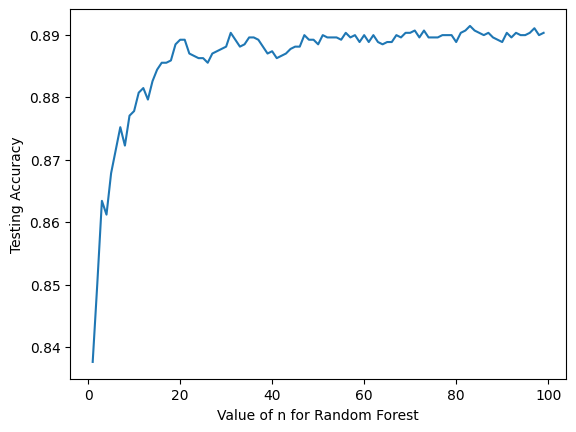

In [121]:
# 7-1. Check Accuracy Score that Gaussian Naive Bayes : Numbers 1 to 100 Trees 
n_range = range(1, 100)
accuracy_scores = []

for n in n_range:
    classifier = RandomForestClassifier(random_state=0, n_estimators=n)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Random Forest')
plt.ylabel('Testing Accuracy')
plt.show()


[0.8052282768777614, 0.8052282768777614, 0.8052282768777614, 0.8159057437407953, 0.8184830633284241, 0.8184830633284241, 0.819219440353461, 0.8398379970544919, 0.8424153166421208, 0.8519882179675994, 0.8464653902798233, 0.8479381443298969, 0.8449926362297496, 0.8527245949926362, 0.8545655375552282, 0.8611929307805597, 0.8604565537555229, 0.8619293078055965, 0.8634020618556701, 0.8619293078055965, 0.8637702503681886, 0.8586156111929307, 0.864138438880707, 0.8622974963181149, 0.8652430044182622, 0.8670839469808542, 0.8667157584683358, 0.8630338733431517, 0.8626656848306333, 0.8634020618556701, 0.8619293078055965, 0.8622974963181149, 0.8626656848306333, 0.8626656848306333, 0.8656111929307806, 0.8652430044182622, 0.8674521354933726, 0.864138438880707, 0.8663475699558174, 0.867820324005891, 0.8689248895434463, 0.867820324005891, 0.8700294550810015, 0.8681885125184094, 0.867820324005891, 0.8689248895434463, 0.8689248895434463, 0.867820324005891, 0.8696612665684831, 0.8726067746686303, 0.8703

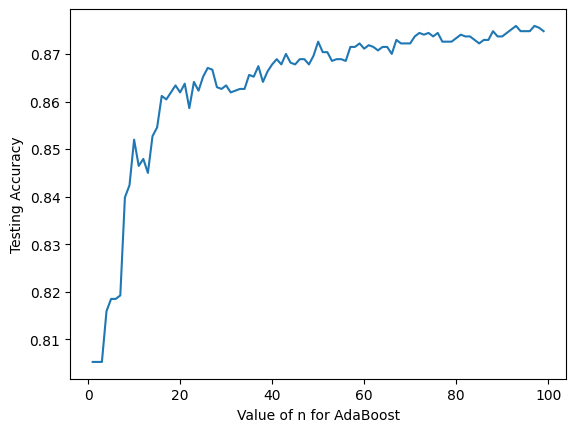

In [122]:
# 7-2. Check Accuracy Score that AdaBoost : Numbers 1 to 100 Trees 
n_range = range(1, 100)
accuracy_scores = []

for n in n_range:
    classifier = AdaBoostClassifier(random_state=0, n_estimators=n)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for AdaBoost')
plt.ylabel('Testing Accuracy')
plt.show()